# TITANIC SURVIVAL PREDITION ANALYSIS USING ML

In [2]:
import pandas as pd
df = pd.read_csv(r'D:\CODtech It intern\task 2\Titanic-Dataset.csv')  
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
print("Columns in the DataFrame:", df.columns.tolist())
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_columns = [col for col in columns_to_drop if col in df.columns]
if existing_columns:
    df.drop(existing_columns, axis=1, inplace=True)
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(f"Missing values after imputation:\n{df.isnull().sum()}")

Columns in the DataFrame: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Missing values after imputation:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\mittu\AppData\Local\Temp\ipykernel_37928\2738714472.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [15]:
if 'Embarked' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    df['FamilySize'] = df['SibSp'] + df['Parch']
else:
    print("The 'Embarked' column doesn't exist in the DataFrame.")
    print("Available columns:", df.columns.tolist())

The 'Embarked' column doesn't exist in the DataFrame.
Available columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize']


# FEATURE SELECTION

<Axes: >

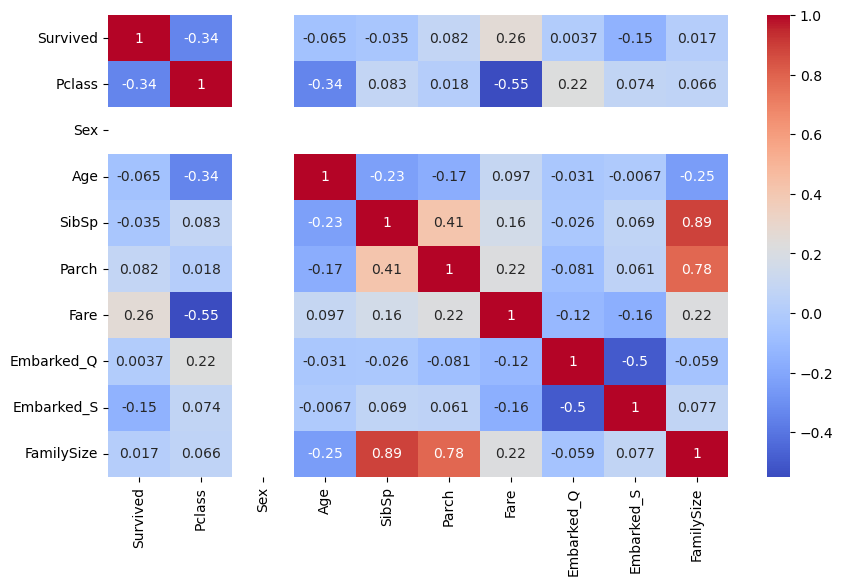

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: >

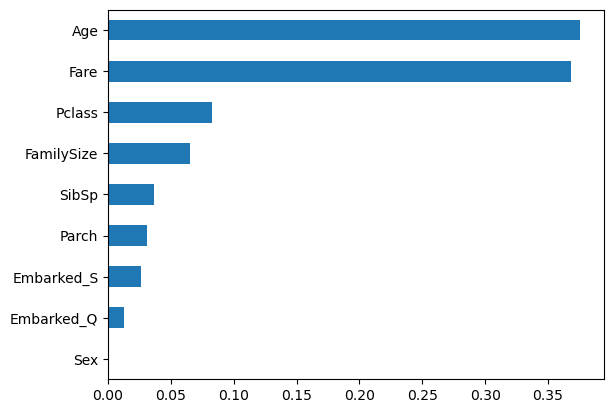

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(df.drop('Survived', axis=1), df['Survived'])

importances = pd.Series(model.feature_importances_, index=df.drop('Survived', axis=1).columns)
importances.sort_values().plot(kind='barh')

# MODEL TRAINING 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# MODEL EVALUATION

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87 18]
 [29 45]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       105
           1       0.71      0.61      0.66        74

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.74      0.74      0.73       179

